<a href="https://colab.research.google.com/github/lokeshveer/Medical-Cost-Prediction/blob/main/multpilelinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mutlplie linear regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='age', ylabel='charges'>

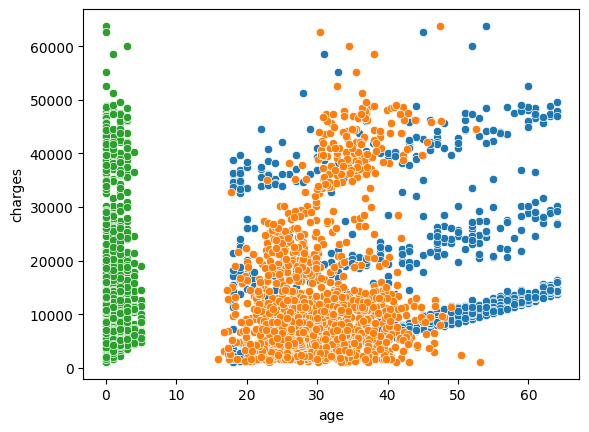

In [5]:
#Use scatter plots to visualize relationships between variables
import seaborn as sns
sns.scatterplot(x='age',y='charges',data=df)
sns.scatterplot(x='bmi',y='charges',data=df)
sns.scatterplot(x='children',y='charges',data=df)


In [7]:
#converting the object data into label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
  if df[i].dtype=='object':
    df[i]=le.fit_transform(df[i])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [9]:
#finding the correlation of charges with everyoe
df.corr()['charges']

,charges
age,0.299008
sex,0.057292
bmi,0.198341
children,0.067998
smoker,0.787251
region,-0.006208
charges,1.000000


<Axes: >

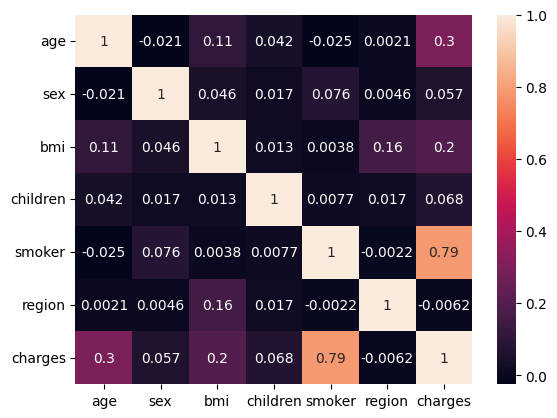

In [10]:
#correlation heat map
sns.heatmap(df.corr(),annot=True)

<Axes: ylabel='charges'>

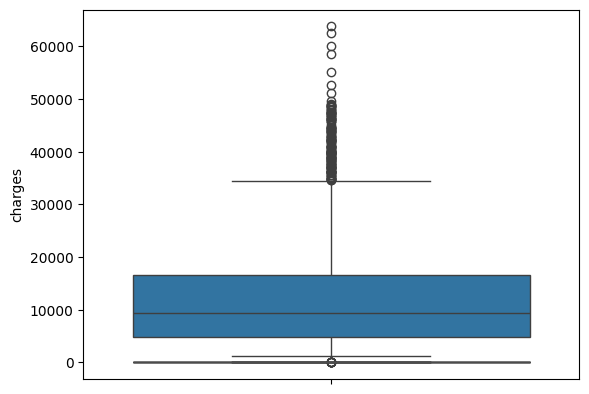

In [14]:
#checking for outliers using box plot
import seaborn as sns
sns.boxplot(df['charges'])
sns.boxplot(df['age'])
sns.boxplot(df['bmi'])
sns.boxplot(df['children'])

In [15]:
# using IQR minizing the outliers
for column in df.select_dtypes(include=['number']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print("Dataset after removing outliers using IQR:\n", df)





Dataset after removing outliers using IQR:
       age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1199 rows x 7 columns]


In [16]:
#using mutplie linear regression
X=df.drop('charges',axis=1)
y=df['charges']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)
print("Mean Squared Error:", mse)
print("R-squared:", r2)



Accuracy: 0.5580582759919098
Mean Squared Error: 27568455.24547175
R-squared: 0.5580582759919098


In [19]:
#predicting the  new data
new_data = pd.DataFrame({'age': [30], 'sex': [1], 'bmi': [25.5], 'children': [2], 'smoker': [1], 'region': [2]})
predicted_charges = model.predict(new_data)
print("Predicted Charges:", predicted_charges)


Predicted Charges: [20553.06411912]


In [17]:
#Check the model’s coefficients and intercept to interpret the relationships.
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [  242.59526798  -452.17888389    73.49251689   360.6452548
 15125.6232962   -494.93100726]
Intercept: -3003.7260082721277


In [23]:

#Identify which factors (Age, BMI, Smoking, etc.) have the most impact on insurance charges
feature_importance = pd.Series(model.coef_, index=X.columns)
feature_importance


,0
age,242.595268
sex,-452.178884
bmi,73.492517
children,360.645255
smoker,15125.623296
region,-494.931007


In [25]:
# Compute VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF results
print(vif_data)

    Feature        VIF
0       age   7.595107
1       sex   1.922910
2       bmi  10.052613
3  children   1.772037
4    smoker   1.104945
5    region   2.853469


In [27]:
# training the model with polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print("Mean Squared Error (Polynomial Regression):", mse_poly)
accuracy_poly = poly_model.score(X_test_poly, y_test)
print("Accuracy (Polynomial Regression):", accuracy_poly)


Mean Squared Error (Polynomial Regression): 26529422.772192314
Accuracy (Polynomial Regression): 0.5747146971969728


In [31]:
#traning the model with ridge and lasso

from sklearn.linear_model import Ridge, Lasso
#import mean absolute error

ridge=Ridge(alpha=1.0)
ridge.fit(X_train,y_train)
y_pred_ridge=ridge.predict(X_test)
mse_ridge=mean_squared_error(y_test,y_pred_ridge)
print("Mean Squared Error (Ridge Regression):", mse_ridge)
accuracy_ridge = ridge.score(X_test, y_test)
print("Accuracy (Ridge Regression):", accuracy_ridge)

lasso=Lasso(alpha=1.0)
lasso.fit(X_train,y_train)
y_pred_lasso=lasso.predict(X_test)
mse_lasso=mean_squared_error(y_test,y_pred_lasso)
print("Mean Squared Error (Lasso Regression):", mse_lasso)
accuracy_lasso = lasso.score(X_test, y_test)
print("Accuracy (Lasso Regression):", accuracy_lasso)


Mean Squared Error (Ridge Regression): 27490161.12415626
Accuracy (Ridge Regression): 0.5593133858138339
Mean Squared Error (Lasso Regression): 27562518.443193715
Accuracy (Lasso Regression): 0.5581534471072476


In [34]:
#comparing the accuary score of ridge lasso linear
from sklearn.metrics import mean_absolute_error

def evaluate_model(model_name, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return {"Model": model_name, "MAE": mae, "RMSE": rmse, "R2 Score": r2}

results = [
    evaluate_model("Linear Regression", y_test, y_pred),
    evaluate_model("Ridge Regression", y_test, y_pred_ridge),
    evaluate_model("Lasso Regression", y_test, y_pred_lasso),
]

results=pd.DataFrame(results)
print(results)


               Model          MAE         RMSE  R2 Score
0  Linear Regression  2791.816570  5250.567136  0.558058
1   Ridge Regression  2785.807191  5243.106057  0.559313
2   Lasso Regression  2791.310669  5250.001756  0.558153
